# 2D convolutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy import signal
from scipy import linalg
import time

Consider a 2D signal $\mathbf{v}$ representing a picture

(372, 497)

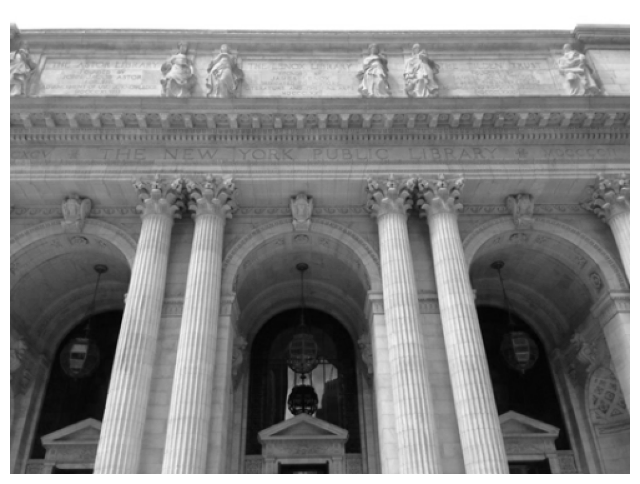

In [6]:
# write here the import path of the image
image_path = './NYlibrary.png'

v = np.mean(imread(image_path), axis = 2)

plt.rcParams['figure.figsize'] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')
v.shape

Consider the following kernels

In [4]:
kernel_blur1 = np.array([[ 1,  2,  1],
                         [ 2,  4,  2],
                         [ 1,  2,  1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10,10)) / 100

kernel_edge1 = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
kernel_edge2 = np.array([[ 0, -1,  0],
                         [-1,  4, -1],
                         [ 0, -1,  0]])
kernel_edge3 = np.array([[ 1,  0, -1],
                         [ 0,  0,  0],
                         [-1,  0,  1]])

kernel_sobel_horizontal = np.array([[ 1,  2,  1],
                                    [ 0,  0,  0],
                                    [-1, -2, -1]])
kernel_sobel_vertical = np.array([[ 1,  0, -1],
                                  [ 2,  0, -2],
                                  [ 1,  0, -1]])

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

kernel_drunk = np.random.randn(50,50)

Choose here the desired filter $\mathbf{k}$

In [53]:
k = kernel_sharpen

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 3 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Direct definition (sums of products)

Convolution without "boundary layers"

Execution time: 2.089164s
(370, 495)


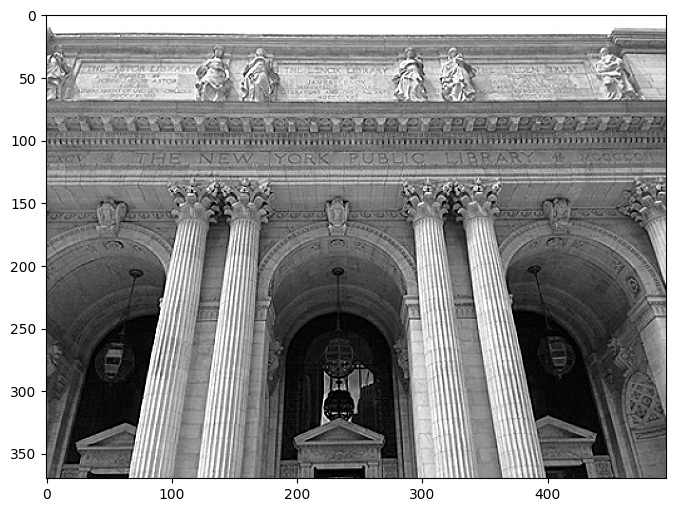

In [54]:
t0 = time.time()
l_out_1 = v.shape[0] - k.shape[0] + 1
l_out_2 = v.shape[1] - k.shape[1] + 1
v_conv1 = np.empty((l_out_1, l_out_2))

for i in range(l_out_1):
    for j in range(l_out_2):
        v_conv1[i][j] = np.sum(np.flip(k) * v[i:i+k.shape[0], j:j+k.shape[1]])
        #for j in range(k.shape[0]):
        #    v_conv2[i] += k[k.shape[0] - j - 1] * v[i + j]
    
print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv1.shape)
plt.imshow(v_conv1, cmap='gray', vmin = vmin, vmax = vmax)

## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.

Execution time: 0.047561s
(372, 497)


(-0.5, 496.5, 371.5, -0.5)

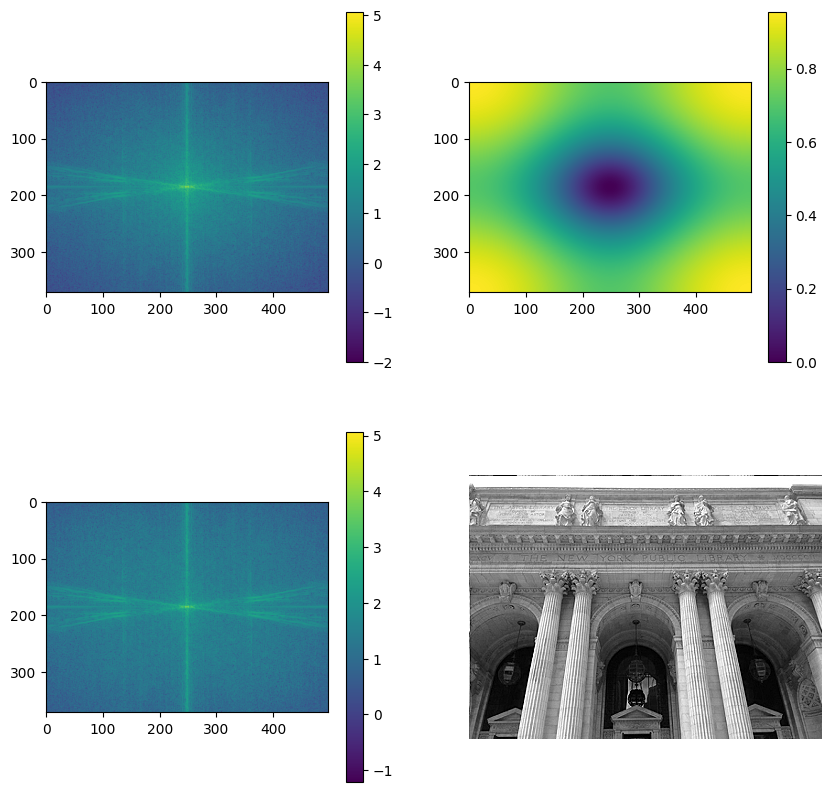

In [55]:
t0 = time.time()

dft_v = np.fft.fft2(v)
dft_k = np.fft.fft2(k, s = v.shape)
dft_conv2 = dft_v * dft_k

v_conv_2 = np.fft.ifft2(dft_conv2).real

print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv_2.shape)

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
img = ax[0, 0].imshow(np.fft.fftshift(np.log10(np.abs(dft_v))))
fig.colorbar(img, ax=ax[0, 0])
img = ax[0, 1].imshow(np.fft.fftshift(np.log10(np.abs(dft_k))))
fig.colorbar(img, ax=ax[0, 1])
img = ax[1, 0].imshow(np.fft.fftshift(np.log10(np.abs(dft_conv2))))
fig.colorbar(img, ax=ax[1, 0])
ax[1, 1].imshow(v_conv_2, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

## 3. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

Execution time: 0.008999s
(374, 499)


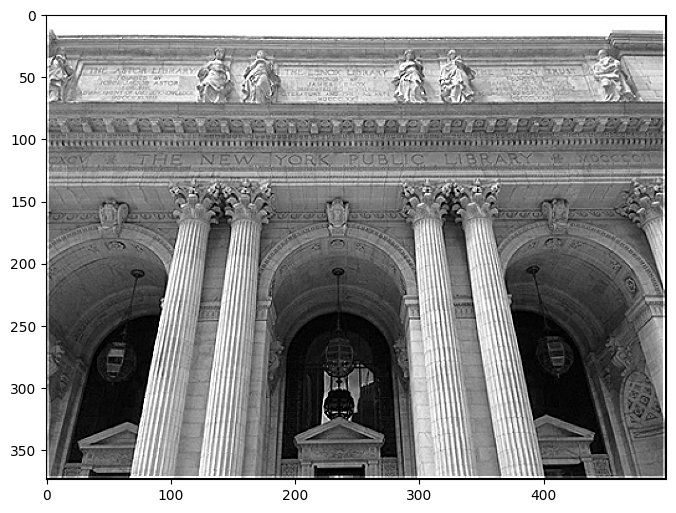

In [56]:
t0 = time.time()

v_conv3 = signal.convolve2d(v, k, mode = 'full')

print(f'Execution time: {(time.time() - t0):1f}s')
print(v_conv3.shape)

plt.imshow(v_conv3, cmap='gray', vmin = vmin, vmax = vmax)